# Simple logistic Regression model 

In [17]:
#!pip install pandas
#!pip install sklearn
#!pip install matplotlib
#!pip install seaborn

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [19]:
#store raw data in 'data' variable
data = pd.read_csv("leaguedata.csv")

#isolate dependant variable
y = data['blueWins'] # binary data
#Y = to_categorical(Y)
#First model will use all features except dependant variable and gameID
X = data.drop(['blueWins','gameId'],axis=1)

#use train_test_split function to separate data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)


<AxesSubplot:title={'center':'Correlation with Target'}>

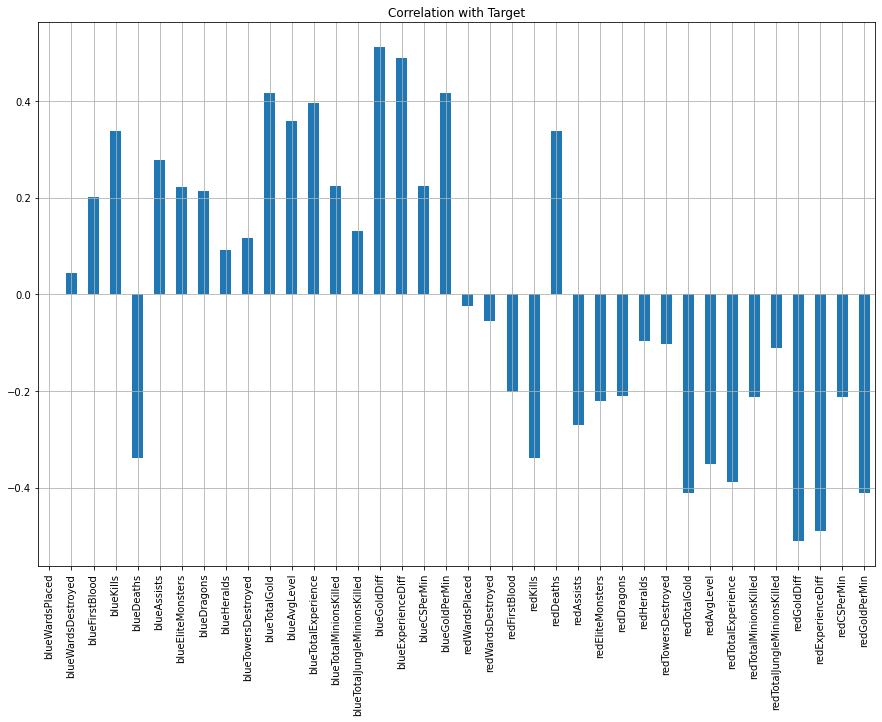

In [20]:
#Correlation with independent variable
X.corrwith(y).plot.bar(figsize = (15, 10), title = "Correlation with Target", fontsize = 10,grid = True)

[[726 268]
 [268 714]]
Accuracy: 0.728744939271255


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.728745,0.727088,0.727088,0.727088


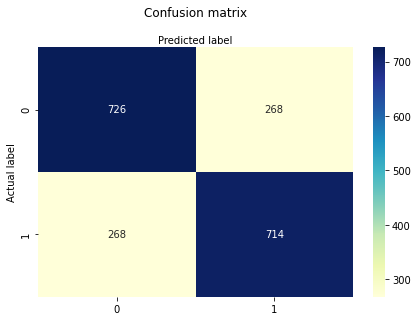

In [21]:
from sklearn.feature_selection import RFE #recursive feature eliminatin

from sklearn.linear_model import LogisticRegression

#min_max_scaler = preprocessing.MinMaxScaler()

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Predicting Test set
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
results = pd.DataFrame([['Logistic Regression', acc,prec,rec,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall','F1 Score'])
results

In [ ]:
#comment